### THE BILLION DOLLAR QUESTION

#### I have named this project the billion dollar question which is pretty cliche but after binge watching Billions, Succesion and Yellow stone , i couldnt find a more suitable name 

#### Billionares make up only 3% of world population, This project intends to try and understand this disproportionate distribution of wealth, and take a deeper look into these Billionares and their characteristics.  Dataset (Kaggle)

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
import sqlite3

In [266]:
billions=pd.read_csv('forbes_2022_billionaires.csv')

In [267]:
billions.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [268]:
billions.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

there are alot of missing data but we wont be using all the columns , so lets get more insights from the data and check for duplicates while we are it

In [269]:
print('Number of duplicate values are : ', billions.duplicated().sum())

Number of duplicate values are :  0


In [270]:
billions.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings
count,2668.000000,2582.000000,2668.000000,2668.0,2668.0,396.000000,127.000000
mean,1302.919040,64.210689,4762.350075,2022.0,4.0,1.856061,2.732283
std,747.807782,13.401258,10540.482258,0.0,0.0,0.971486,1.891706
min,1.000000,19.000000,1000.000000,2022.0,4.0,1.000000,1.000000
25%,665.000000,55.000000,1500.000000,2022.0,4.0,1.000000,2.000000
50%,1292.000000,64.000000,2400.000000,2022.0,4.0,2.000000,2.000000
75%,1929.000000,74.000000,4300.000000,2022.0,4.0,2.000000,3.000000
max,2578.000000,100.000000,219000.000000,2022.0,4.0,5.000000,14.000000


Summary

The maximum networth of the billionaires is 219 Billion dollars and the minimum networth is 1 Billion. The networth on average is 4.8 Billion dollars.

The maximum age of a billionaire is 100 years and the youngest age is 19. The age on average is 64 years.

In [271]:
# lets select the desired columns, also considering columns with few null values
billions = billions.loc[:,["rank","personName","age","finalWorth","category","country","gender","source","selfMade"]]


In [272]:
billions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        2668 non-null   int64  
 1   personName  2668 non-null   object 
 2   age         2582 non-null   float64
 3   finalWorth  2668 non-null   float64
 4   category    2668 non-null   object 
 5   country     2655 non-null   object 
 6   gender      2652 non-null   object 
 7   source      2668 non-null   object 
 8   selfMade    2668 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 169.5+ KB


In [273]:
billions.head()

,rank,personName,age,finalWorth,category,country,gender,source,selfMade
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,"Tesla, SpaceX",True
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Amazon,True
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,LVMH,False
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Microsoft,True
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,Berkshire Hathaway,True


### Data cleaning

we will try to save as much data as possible

In [274]:
# convert the selfmade column from bool to string
billions['selfMade'] = billions['selfMade'].astype(str)

In [275]:
# from the insights from the data, majority of the billionaires are over 50 , so lets fill with the average and gender with none
billions['age'].fillna(billions['age'].mean(), inplace=True)
billions['gender'] = billions['gender'].fillna('unknown')
billions['country'] = billions['country'].fillna('unknown')

In [276]:
# lets rename some columns to better appreciate the dataset
billions.rename(columns={'personName': 'Name'}, inplace= True)
billions.rename(columns={'finalWorth': 'Networth'}, inplace= True)
billions.rename(columns={'category': 'Industry'}, inplace= True)
billions['country']=billions['country'].replace({'Eswatini (Swaziland)':'Eswatini'})

In [277]:
billions.dropna(inplace=True)

In [278]:
billions.head()

,rank,Name,age,Networth,Industry,country,gender,source,selfMade
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,"Tesla, SpaceX",True
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Amazon,True
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,LVMH,False
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Microsoft,True
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,Berkshire Hathaway,True


The Path library from Python allows me to create a SQL Lite database that I can connect to with Pandas' 'to_sql' method

In [279]:
Path('forbes_2022_billionaires.db').touch()
billion_connect = sqlite3.connect('forbes_2022_billionaires.db')
billion_c = billion_connect.cursor()

In [280]:
billions.to_sql('forbes_2022_billionaires', billion_connect, if_exists='append', index=False)

In [281]:
# lets see if it works 
billion_list = pd.read_sql(''' SELECT * FROM forbes_2022_billionaires LIMIT 10 ''', billion_connect)
billion_list

,rank,Name,age,Networth,Industry,country,gender,source,selfMade
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,"Tesla, SpaceX",True
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Amazon,True
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,LVMH,False
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Microsoft,True
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,Berkshire Hathaway,True
5,6,Larry Page,49.0,111000.0,Technology,United States,M,Google,True
6,7,Sergey Brin,48.0,107000.0,Technology,United States,M,Google,True
7,8,Larry Ellison,77.0,106000.0,Technology,United States,M,software,True
8,9,Steve Ballmer,66.0,91400.0,Technology,United States,M,Microsoft,True
9,10,Mukesh Ambani,64.0,90700.0,Diversified,India,M,diversified,False


### Data analysis

lets explore the dataset by asking the right questions

#### Top Ten Billionaires according to networth

In [282]:
top_ten = pd.read_sql(''' SELECT Name, Networth FROM forbes_2022_billionaires GROUP BY Networth
                ORDER BY Networth DESC LIMIT 10 ''', billion_connect)
top_ten

,Name,Networth
0,Elon Musk,219000.0
1,Jeff Bezos,171000.0
2,Bernard Arnault & family,158000.0
3,Bill Gates,129000.0
4,Warren Buffett,118000.0
5,Larry Page,111000.0
6,Sergey Brin,107000.0
7,Larry Ellison,106000.0
8,Steve Ballmer,91400.0
9,Mukesh Ambani,90700.0


In [340]:
fig = px.bar(top_ten, x = 'Name', y = 'Networth', template = 'plotly_dark', color = 'Networth', opacity = 0.8, title='<b>Top 10 billionanaires and their networth')
fig.show()

Elon musk with 219B tops the list

#### What are the Industries of the top 10 billionaires and Industry with the most Billionares?

In [284]:
top_ten_ind = pd.read_sql(''' SELECT Name, Networth, source, Industry FROM forbes_2022_billionaires GROUP BY Networth
                              ORDER BY Networth
                                DESC LIMIT 10 ''', billion_connect)
top_ten_ind

,Name,Networth,source,Industry
0,Elon Musk,219000.0,"Tesla, SpaceX",Automotive
1,Jeff Bezos,171000.0,Amazon,Technology
2,Bernard Arnault & family,158000.0,LVMH,Fashion & Retail
3,Bill Gates,129000.0,Microsoft,Technology
4,Warren Buffett,118000.0,Berkshire Hathaway,Finance & Investments
5,Larry Page,111000.0,Google,Technology
6,Sergey Brin,107000.0,Google,Technology
7,Larry Ellison,106000.0,software,Technology
8,Steve Ballmer,91400.0,Microsoft,Technology
9,Mukesh Ambani,90700.0,diversified,Diversified


In [285]:
px.scatter(top_ten_ind,y='Networth',x='Name',template='plotly_dark',size='Networth',color='Industry',opacity=0.85,title='<b>Industries of top 10 billionaires')

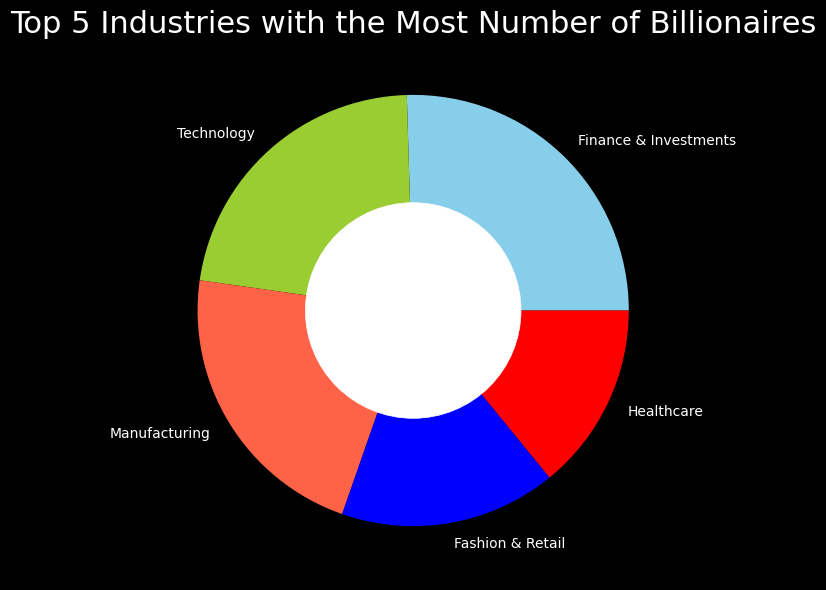

In [286]:
a=billions['Industry'].value_counts().head()
index=a.index
industries=a.values
custom_colors= ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(7,7))
plt.pie(industries,labels=index,colors=custom_colors)
central_circle=plt.Circle((0,0),0.5,color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=14)
plt.title("Top 5 Industries with the Most Number of Billionaires",fontsize=22)
plt.show()

In [341]:
source_networth = billions.groupby('source').sum()[['Networth']].sort_values('Networth', ascending = False).reset_index().head(10)
fig=px.scatter(source_networth, x ='source', y = 'Networth', template = 'plotly_dark', color = 'source', size = 'Networth' , opacity = 0.85, title="<b>  Billionares most profitable domain")
fig.show()

Majority of the billionare source are from real estate followed closely by diversified income

In [288]:
Top_industry = pd.read_sql(''' SELECT Industry,SUM(Networth) AS SUM FROM forbes_2022_billionaires
                                GROUP BY Industry
                                ORDER BY SUM DESC
                                Limit 10
                                ''', billion_connect)

Top_industry

,Industry,SUM
0,Technology,6544100.0
1,Finance & Investments,5196100.0
2,Fashion & Retail,4835800.0
3,Manufacturing,3281100.0
4,Diversified,2824500.0
5,Food & Beverage,2803250.0
6,Healthcare,2141700.0
7,Real Estate,2069400.0
8,Automotive,1749600.0
9,Media & Entertainment,1490300.0


In [289]:
fig=px.scatter(Top_industry, x ='Industry', y = 'SUM', template = 'plotly_dark', color = 'Industry', size = 'SUM' , opacity = 0.85, title="<b>Total networth of billionaires in top 10 industries")
fig.show()

Majority of the billionaires are in the Technology industry followed by Finance and investment

#### The Age distribution and Age group of the billionaires

Text(0.5, 1.0, 'The distribution of age')

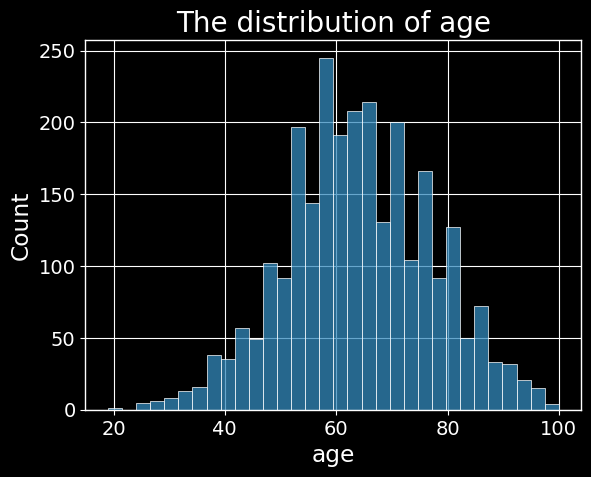

In [290]:
sns.histplot(billions["age"])
plt.title('The distribution of age', fontsize = 20)

In [291]:
billions['group'] = pd.cut(billions['age'], bins = [18, 30, 50, 100], include_lowest = True, labels = ['18-30', '30-50', '50+'])
billions['group']

0       30-50
1         50+
2         50+
3         50+
4         50+
        ...  
2663      50+
2664      50+
2665      50+
2666    30-50
2667      50+
Name: group, Length: 2668, dtype: category
Categories (3, object): ['18-30' < '30-50' < '50+']

<AxesSubplot:>

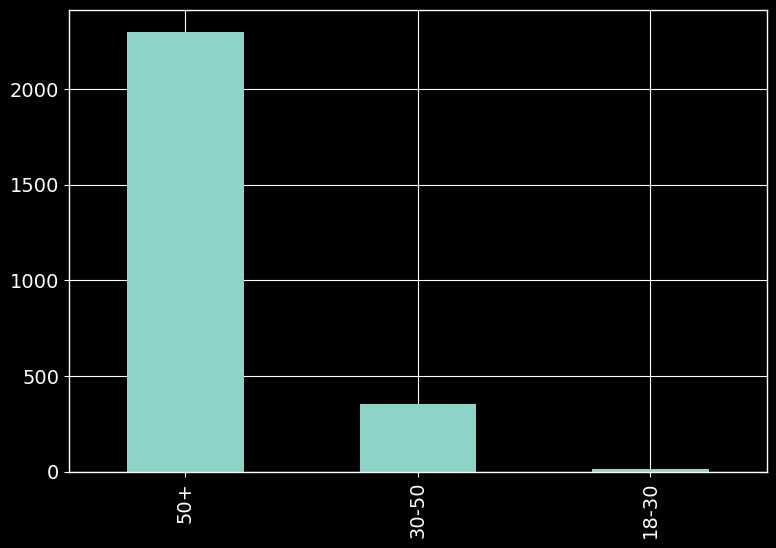

In [292]:
billions['group'].value_counts().plot(kind='bar', figsize=(9,6))


As observed from the data insights , majority of the billionaires are above 50

lets analyze further to see the Indutries and source of wealth according to age group, especially for those under 50

In [293]:
oldest_billion = pd.read_sql(''' SELECT Name, Age, Networth,Industry, selfMade FROM forbes_2022_billionaires
                                WHERE AGE > 50
                                GROUP BY AGE
                                ORDER BY AGE DESC
                                ''', billion_connect)
oldest_billion

,Name,age,Networth,Industry,selfMade
0,George Joseph,100.000000,1800.0,Finance & Investments,True
1,Robert Kuok,98.000000,11700.0,Diversified,True
2,Masatoshi Ito,97.000000,4600.0,Fashion & Retail,True
3,Ted Lerner & family,96.000000,4500.0,Real Estate,True
4,Stef Wertheimer & family,95.000000,6200.0,Manufacturing,True
5,Lee Shau Kee,94.000000,32600.0,Real Estate,True
6,Li Ka-shing,93.000000,34800.0,Diversified,True
7,Pallonji Mistry,92.000000,15000.0,Construction & Engineering,False
8,Warren Buffett,91.000000,118000.0,Finance & Investments,True
9,Kushal Pal Singh,90.000000,8800.0,Real Estate,False


In [294]:
fig = px.bar(oldest_billion[:10], x = 'Name', y = 'Networth', template = 'plotly_dark', color = 'Industry', opacity = 0.8, title = '<b>Top 10 oldest billionaires and their sources')
fig.show()

Summary

Warren buffet tops this this list in terms of wealth and not age 

the oldest is George Joseph at 100 from the Finance & Investments sector same as warren buffet

In [295]:
oldest_billion_us = pd.read_sql(''' SELECT Name, Age, Networth, selfMade FROM forbes_2022_billionaires
                                WHERE AGE > 50 AND country = 'United States'
                                GROUP BY AGE
                                ORDER BY AGE DESC
                                ''', billion_connect)
oldest_billion_us

,Name,age,Networth,selfMade
0,George Joseph,100.000000,1800.0,True
1,Charles Munger,98.000000,2500.0,True
2,S. Daniel Abraham,97.000000,2000.0,True
3,Ted Lerner & family,96.000000,4500.0,True
4,Charles Dolan & family,95.000000,5400.0,True
5,Billy Joe (Red) McCombs,94.000000,1700.0,True
6,Gordon Moore,93.000000,9500.0,True
7,Donald Newhouse,92.000000,14400.0,False
8,Warren Buffett,91.000000,118000.0,True
9,Johnelle Hunt,90.000000,4700.0,True


In [296]:

fig = px.bar(oldest_billion_us[:15], x = 'Name', y = 'Networth', template = 'plotly_dark', color = 'age', opacity = 0.8, title = '<b>Oldest billionaires in the US')
fig.show()

Warren buffet still tops this list 

In [297]:
Mid_age = pd.read_sql(''' SELECT DISTINCT Name, Networth,Age,Industry, selfMade FROM forbes_2022_billionaires
                        WHERE age BETWEEN 30 AND 50
                        GROUP BY age
                        Order by age DESC
                        
                       ''', billion_connect)
Mid

,Name,Networth,age,Industry,selfMade
0,Elon Musk,219000.0,50.0,Automotive,True
1,Ma Huateng,37200.0,50.0,Technology,True
2,William Lei Ding,25200.0,50.0,Technology,True
3,Zhang Zhidong,12800.0,50.0,Technology,True
4,Andrey Melnichenko,11100.0,50.0,Metals & Mining,True
...,...,...,...,...,...
350,Hu Kunhui,1600.0,31.0,Healthcare,False
351,Pedro de Godoy Bueno,1100.0,31.0,Healthcare,False
352,Sam Bankman-Fried,24000.0,30.0,Finance & Investments,True
353,Alex Atallah,2200.0,30.0,Technology,True


In [298]:
young = pd.read_sql(''' SELECT DISTINCT Name, Networth,Age,Industry, selfMade FROM forbes_2022_billionaires
                        WHERE age < 30
                        Order by age DESC
                       ''', billion_connect)
young

,Name,Networth,age,Industry,selfMade
0,Stanley Tang,1200.0,29.0,Technology,True
1,Andy Fang,1100.0,29.0,Technology,True
2,Gary Wang,5900.0,28.0,Finance & Investments,True
3,Gustav Magnar Witzoe,4500.0,28.0,Food & Beverage,False
4,Ryan Breslow,2000.0,27.0,Technology,True
5,Austin Russell,1600.0,27.0,Automotive,True
6,Henrique Dubugras,1500.0,26.0,Finance & Investments,True
7,Katharina Andresen,1300.0,26.0,Diversified,False
8,Pedro Franceschi,1500.0,25.0,Finance & Investments,True
9,Wang Zelong,1500.0,25.0,Metals & Mining,False


Text(0, 0.5, 'Net worth in Billions (USD)')

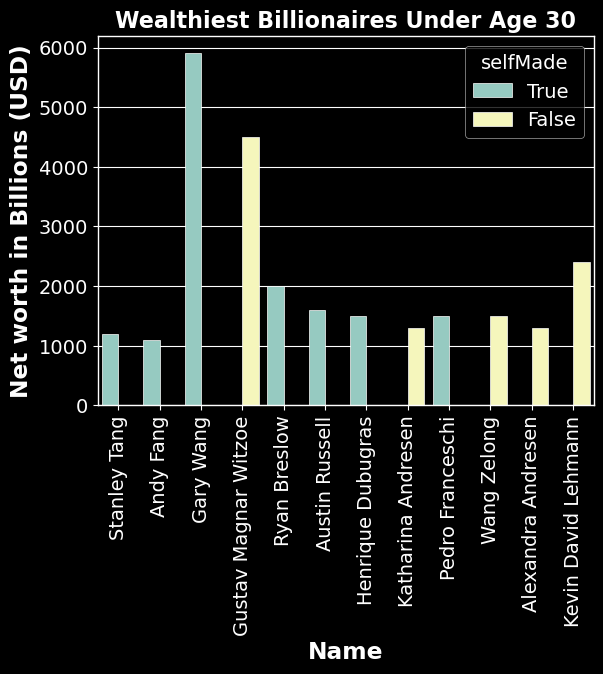

In [299]:
plt.style.use('dark_background')
plt.title('Wealthiest Billionaires Under Age 30', weight = 'bold', color='white').set_fontsize(16)
plt.xticks(rotation=90)
sns.barplot('Name', 'Networth', 'selfMade', data = young, edgecolor='white')
plt.xlabel('Name', weight = 'bold', color = 'white')
plt.ylabel('Net worth in Billions (USD)', weight = 'bold', color = 'white')

Their is fair balance between the young billionaires in terms of creation of wealth whether self made or not , unlike the older demographic where a large number of them are self made

In [300]:
fig = px.bar(billions.sort_values('age',ascending = True)[:10], x = 'Name', y = 'Networth', template = 'plotly_dark', color = 'source', opacity = 0.8, title = '<b>Top 10 youngest billionaires and their sources')
fig.show()

Summary

The youngest billionaire in top 10 billionaires is Kevin David Lehmann with the age of 19 and a netoworth of 2.4 B dollars

The richest billionaire in top 10 youngest billionaires is Gary Wang and he gets his networth from Crypto Currency Exchange.

The second richest billionaire in top 10 youngest billionaires is Gustav Magnar Witzoe and networth coming from Fish Farming.


#### What countries have the most billionaires?

In [301]:
rich_country = pd.read_sql(''' SELECT  country , SUM(Networth)AS SUM, COUNT(Name) AS No_B FROM forbes_2022_billionaires
                                GROUP BY country
                                ORDER BY SUM DESC
                                LIMIT 15 ''', billion_connect)

rich_country

,country,SUM,No_B
0,United States,14260500.0,2244
1,China,6435750.0,1713
2,India,2169000.0,477
3,Germany,1496700.0,336
4,France,1363800.0,102
5,United Kingdom,1184400.0,255
6,Switzerland,1021800.0,219
7,Hong Kong,1006500.0,204
8,Russia,731400.0,195
9,Australia,580500.0,123


In [328]:

fig=px.bar(rich_country, x ='country', y = 'SUM', template = 'plotly_dark', color = 'country' , opacity = 0.85, title="<b>Total networth of billionaires in top 10 countries")
fig.show()

Summary

United States has the highest total networth

China is the second country in top 10 countries

But the margin between the two countries is pretty wide owing to the number of Billionaires in USA

In [303]:
rich_industry = pd.read_sql(''' SELECT  country ,SUM(Networth) as SUM,Industry FROM forbes_2022_billionaires
                                WHERE country = 'United States'
                                GROUP BY Industry
                                ORDER BY SUM DESC
                                
                                LIMIT 15 ''', billion_connect)

rich_industry

,country,SUM,Industry
0,United States,4377600.0,Technology
1,United States,3033600.0,Finance & Investments
2,United States,1646700.0,Fashion & Retail
3,United States,893700.0,Food & Beverage
4,United States,805500.0,Automotive
5,United States,776100.0,Media & Entertainment
6,United States,500400.0,Real Estate
7,United States,434400.0,Diversified
8,United States,422100.0,Energy
9,United States,344700.0,Healthcare


In [342]:
fig = px.scatter(rich_industry, x = 'Industry', y = 'SUM', template = 'plotly_dark', color = 'Industry', size = 'SUM', opacity = 0.85, title = "<b>Top industries in the united states", height = 560)
fig.show()

In [305]:
rich_industry_c = pd.read_sql(''' SELECT  country ,SUM(Networth) as SUM,Industry FROM forbes_2022_billionaires
                                WHERE country = 'China'
                                GROUP BY Industry
                                ORDER BY SUM DESC
                                
                                LIMIT 15 ''', billion_connect)

rich_industry_c

,country,SUM,Industry
0,China,1400400.0,Manufacturing
1,China,1054800.0,Technology
2,China,731700.0,Healthcare
3,China,716250.0,Food & Beverage
4,China,570600.0,Automotive
5,China,412800.0,Real Estate
6,China,303900.0,Fashion & Retail
7,China,270300.0,Energy
8,China,222600.0,Media & Entertainment
9,China,186000.0,Metals & Mining


In [343]:
fig = px.scatter(rich_industry_c, x = 'Industry', y = 'SUM', template = 'plotly_dark', color = 'Industry', size = 'SUM', opacity = 0.85, title = "<b>Top industries in China", height = 560)
fig.show()

Summary

The most profitable industry in US is Technology 

The most profitable industry in China is Manufacturing 

In [307]:
other_country = pd.read_sql(''' SELECT  country , SUM(Networth)AS SUM, COUNT(Name) AS No_B FROM forbes_2022_billionaires
                                GROUP BY country
                                ORDER BY SUM ASC
                                LIMIT 60 ''', billion_connect)

other_country

,country,SUM,No_B
0,Andorra,3900.0,3
1,Greece,4200.0,3
2,Bahrain,4500.0,3
3,Nepal,4500.0,3
4,Tanzania,4500.0,3
5,Eswatini,5300.0,1
6,Turks and Caicos Islands,6600.0,3
7,Liechtenstein,6900.0,3
8,Guernsey,7500.0,3
9,Hungary,7500.0,6


In [339]:
top_africa = pd.read_sql(''' SELECT DISTINCT Name, country , Networth, age ,Industry,selfMade Source FROM forbes_2022_billionaires
                               WHERE country in ('Egypt', 'Nigeria','Morocco','Algeria','South Africa','Eswatini')
                                ORDER BY Networth DESC
                                LIMIT 50 ''', billion_connect)

top_africa

,Name,country,Networth,age,Industry,Source
0,Aliko Dangote,Nigeria,14000.0,64.0,Manufacturing,True
1,Johann Rupert & family,South Africa,8900.0,71.0,Fashion & Retail,False
2,Nicky Oppenheimer & family,South Africa,8700.0,76.0,Metals & Mining,False
3,Nassef Sawiris,Egypt,7700.0,61.0,Construction & Engineering,False
4,Mike Adenuga,Nigeria,7300.0,68.0,Diversified,True
5,Abdulsamad Rabiu,Nigeria,6900.0,61.0,Diversified,False
6,Nathan Kirsh,Eswatini,5300.0,90.0,Fashion & Retail,True
7,Issad Rebrab & family,Algeria,5100.0,78.0,Food & Beverage,True
8,Naguib Sawiris,Egypt,3400.0,67.0,Telecom,False
9,Patrice Motsepe,South Africa,3300.0,60.0,Metals & Mining,True


In [334]:
fig=px.bar(top_africa, x ='Name', y = 'Networth', template = 'plotly_dark', color = 'country' , opacity = 0.85, title="<b>Top billionaires in Africa")
fig.show()

The country with the richest billionaire in Africa is Nigeria with Aliko Dangote (1.4B)

The countries with the most billionaires are Egypt AND South Africa both with (5)

The country with the least billionaire ESWATINI (1)

In [337]:
africa = pd.read_sql(''' SELECT  country , SUM(Networth)AS SUM, Industry, Source FROM forbes_2022_billionaires
                               WHERE country in ('Egypt', 'Nigeria','Morocco','Algeria','South Africa','Eswatini')
                               GROUP BY country
                                ORDER BY SUM DESC
                                LIMIT 50 ''', billion_connect)

africa

,country,SUM,Industry,source
0,Nigeria,84600.0,Manufacturing,"cement, sugar"
1,South Africa,75000.0,Fashion & Retail,luxury goods
2,Egypt,48600.0,Construction & Engineering,"construction, investments"
3,Algeria,15300.0,Food & Beverage,food
4,Morocco,9900.0,Diversified,"petroleum, diversified"
5,Eswatini,5300.0,Fashion & Retail,"retail, real estate"


In [321]:
px.scatter(africa,y='SUM',x='country',template='plotly_dark',size='SUM',color='Industry',opacity=0.85,title='<b> Top Industry Africa')

The most profitable industries in Africa are the manufacturing and Fashion industries

In [333]:
fig=px.bar(top_africa, x ='Name', y = 'Networth', template = 'plotly_dark', color = 'source' , opacity = 0.85, title="<b>Top billionaire Domain in Africa")
fig.show()

The richest man in Africa , Aliko from Nigeria dangote generate income from manufacturing of cement and sugar 

He is also self made

followed by Johann Rupert of luxury goods from south africa at (8.9B)

#### Billionaire analysis based on gender

Text(0.5, 1.0, 'Gender distribution')

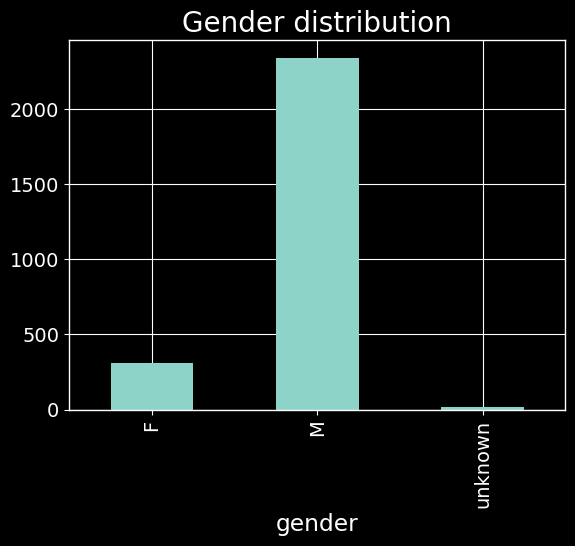

In [309]:
billionaire_gender = billions.groupby(["gender"]).size()
billionaire_gender.plot(kind = "bar")
plt.title('Gender distribution', fontsize = 20)

In [310]:
 billions.groupby(["gender"]).size()

gender
F           311
M          2341
unknown      16
dtype: int64

In [311]:
female_billion = pd.read_sql(''' SELECT DISTINCT Name, Gender, Networth, Rank,selfMade, Industry, source FROM forbes_2022_billionaires
                                WHERE Gender = 'F'
                                GROUP BY Networth
                                ORDER BY Rank ASC
                                LIMIT 15 ''', billion_connect)
female_billion

,Name,gender,Networth,rank,selfMade,Industry,source
0,Francoise Bettencourt Meyers & family,F,74800.0,14,False,Fashion & Retail,L'Oréal
1,Alice Walton,F,65300.0,18,False,Fashion & Retail,Walmart
2,Julia Koch & family,F,60000.0,21,False,Diversified,Koch Industries
3,MacKenzie Scott,F,43600.0,30,False,Technology,Amazon
4,Jacqueline Mars,F,31700.0,41,False,Food & Beverage,"candy, pet food"
5,Gina Rinehart,F,30200.0,46,False,Metals & Mining,mining
6,Miriam Adelson,F,27500.0,50,False,Gambling & Casinos,casinos
7,Susanne Klatten,F,24300.0,56,False,Automotive,"BMW, pharmaceuticals"
8,Iris Fontbona & family,F,22800.0,67,False,Metals & Mining,mining
9,Abigail Johnson,F,21200.0,75,False,Finance & Investments,money management


Seeing as most of the women's names are attached to family indicating they are Heiress , it is safe to assume that most of thier wealth was inherited

In [312]:
px.scatter(female_billion,y='Networth',x='Name',template='plotly_dark',size='Networth',color='Industry',opacity=0.85,title='<b>Industries of top 10 Female billionaires')

In [313]:
female_billion_s = pd.read_sql(''' SELECT DISTINCT Name, Gender,country Networth, Rank,selfMade, Industry, source FROM forbes_2022_billionaires
                                WHERE Gender = 'F' AND selfMade= 'True'
                                GROUP BY Networth
                                ORDER BY Rank ASC
                                LIMIT 15 ''', billion_connect)
female_billion_s

,Name,gender,Networth,rank,selfMade,Industry,source
0,Fan Hongwei & family,F,China,88,True,Energy,petrochemicals
1,Wu Yajun,F,China,119,True,Real Estate,real estate
2,Diane Hendricks,F,United States,183,True,Construction & Engineering,roofing
3,Wang Laichun,F,China,214,True,Technology,electronics components
4,Zhong Huijuan,F,China,275,True,Healthcare,pharmaceuticals
5,Zhou Qunfei & family,F,Hong Kong,336,True,Technology,smartphone screens
6,Judy Faulkner,F,United States,343,True,Technology,health IT
7,Lucia Maggi & family,F,Brazil,350,True,Diversified,agribusiness
8,Melanie Perkins,F,Australia,386,True,Technology,software
9,Cheng Xue,F,China,398,True,Food & Beverage,soy sauce


In [344]:
fig = px.bar(female_billion_s, x = 'Name', y = 'Networth', template = 'plotly_dark', color = 'Industry', opacity = 0.8, title = '<b>Top Self made female billionaires and their industry')
fig.show()

Majority of the self made female billionares are from china and a good number are in the technology industry

### CONCLUSION

#### Richest

The richest billionaire is Elon Musk from United States with a networth of 219 B dollars with an age of 50 years. His source of networth is Tesla and SpaceX and he mainly focused on the industry of Automative

The richest female billionare is Francoise Bettencourt Meyers of L'Oréal which is a very succesful family business

The richest billionare in Africa is Aliko Dangote from Nigeria, 64 years and into the manufacturing of cement and sugar 

#### Youngest

The youngest billionaire is Kevin David Lehmann with a networth of 2.4 B dollars with an age of 19 years. His source of networth is Drugstores
Oldest

#### Oldest

The oldest billionaire is George Joseph from United States with a networth of 1.8 B dollars with an age of 100 years. His source of networth is Insurance and he mainly focused on the industry of Fincance and Investment
Country

#### Overview

Most of the top 10 billionaires are from United States. It's highest networth is in the industry of Fincance and Investment and additonaly, it's the only country to be doing business in Gambling and Casinos

The country with the most billionaires is United states (Technology) followed by China whose source is from manufacturing

The Industry of Technology is the one having the highest total networth. Furthermore, most of the top 10 billionaires have their networth in this industry.
Source

The source of Real state is the one having the highest total networth. However, none of the top 10 billionaires have their networth in this source.